# Problem Statement

Dataset contains historical customer data of an airline company. The company wants to optimize its marketing strategies. The CMO has no starting point to create customer profile and wants your advice to create it based on data.

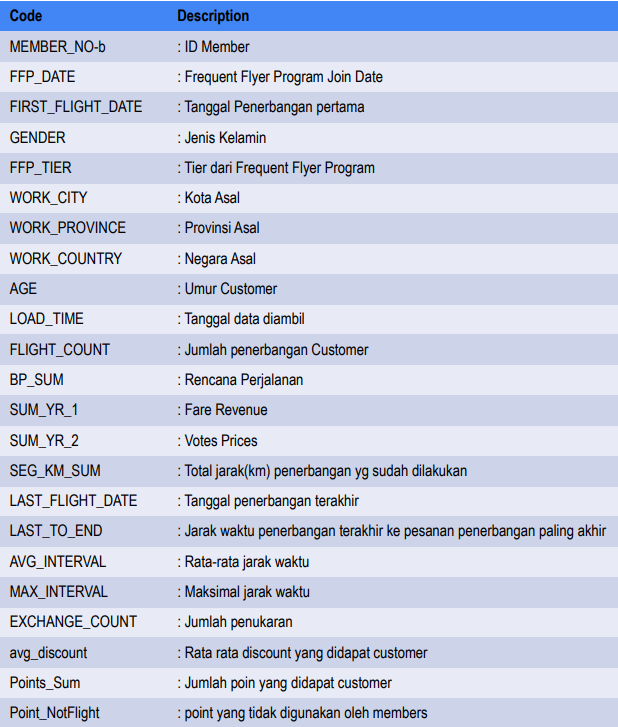

# Goal

Create customer segments based on customer data for marketing purpose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [2]:
url = 'https://raw.githubusercontent.com/Hakuna-Matata-Travel-Insurance/week-16/main/flight.csv'

In [3]:
df = pd.read_csv(url)
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
8135,58709,10/19/2010,10/19/2010,Male,4,wuhan,hubei,CN,43.0,3/31/2014,...,14494.0,40241,2/24/2014,37,28.304348,136,0,0.627453,16046,0
5313,59114,2/23/2011,2/23/2011,Male,4,beijing,beijing,CN,53.0,3/31/2014,...,14581.0,40593,3/20/2014,12,32.181818,148,0,0.810775,27787,0
54678,29678,12/19/2007,12/20/2007,Male,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,1213.0,4979,3/20/2014,12,114.600000,260,0,0.412888,3462,25
41151,16400,2/2/2013,4/25/2013,Male,4,jilinshi,jilinsheng,CN,55.0,3/31/2014,...,4531.0,4665,10/15/2013,169,43.250000,111,0,0.944000,4140,0
30725,470,12/11/2012,6/19/2013,Male,4,beijing,beijing,CN,33.0,3/31/2014,...,4995.0,11559,3/22/2014,10,92.333333,256,0,0.625351,7700,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
df.nunique()

MEMBER_NO            62988
FFP_DATE              3068
FIRST_FLIGHT_DATE     3406
GENDER                   2
FFP_TIER                 3
WORK_CITY             3234
WORK_PROVINCE         1165
WORK_COUNTRY           118
AGE                     84
LOAD_TIME                1
FLIGHT_COUNT           153
BP_SUM               23449
SUM_YR_1             15828
SUM_YR_2             16767
SEG_KM_SUM           29081
LAST_FLIGHT_DATE       731
LAST_TO_END            731
AVG_INTERVAL         10706
MAX_INTERVAL           706
EXCHANGE_COUNT          28
avg_discount         54179
Points_Sum           25062
Point_NotFlight         99
dtype: int64

In [6]:
# Change data type to datetime
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

In [7]:
# Change data type to integer
df['AGE'] = df['AGE'].astype('Int64')

In [8]:
# Check descriptive statistics
df.describe()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988,62988,62988.000000,62568.0,62988,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62567,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,2010-03-06 23:58:48.672128,2010-09-01 17:59:44.911411968,4.102162,42.476346,2014-03-30 23:59:59.999999744,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,2013-10-06 15:32:03.103233280,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
min,1.000000,2004-11-01 00:00:00,1905-12-31 00:00:00,4.000000,6.0,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,2008-04-12 00:00:00,2008-12-14 18:00:00,4.000000,35.0,2014-03-31 00:00:00,3.000000,2518.000000,1003.000000,780.000000,4747.000000,2013-07-07 00:00:00,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,2010-10-08 00:00:00,2011-04-23 00:00:00,4.000000,41.0,2014-03-31 00:00:00,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,2013-12-14 00:00:00,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,2012-03-29 00:00:00,2012-07-26 00:00:00,4.000000,48.0,2014-03-31 00:00:00,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,2014-03-03 00:00:00,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,2013-03-31 00:00:00,2015-05-30 00:00:00,6.000000,110.0,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000
std,18183.213715,NaN,NaN,0.373856,9.885915,NaN,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,NaN,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164


In [9]:
# divide numerical & categorical data
num = df.select_dtypes(exclude='object')
cat = df.select_dtypes(include='object')

# columns
numerical = num.columns
categorical = cat.columns

In [10]:
# summary of categorical data
df[categorical].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


## Univariate Analysis

### Numerical Data Visualization

<Axes: xlabel='FLIGHT_COUNT', ylabel='Count'>

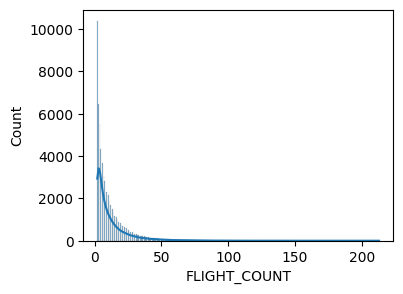

In [11]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='FLIGHT_COUNT', kde=True)

<Axes: xlabel='SEG_KM_SUM', ylabel='Count'>

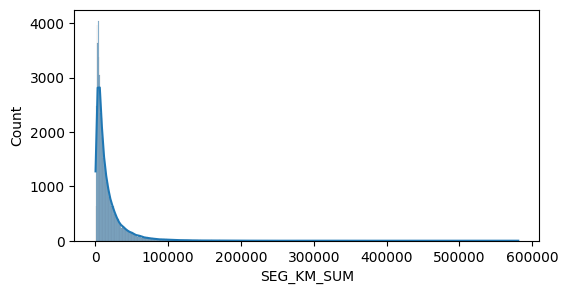

In [12]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='SEG_KM_SUM', kde=True)

<Axes: xlabel='LAST_TO_END', ylabel='Count'>

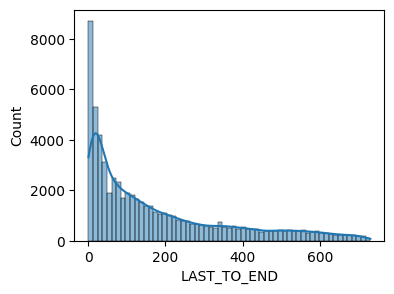

In [13]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='LAST_TO_END', kde=True)

<Axes: xlabel='AVG_INTERVAL', ylabel='Count'>

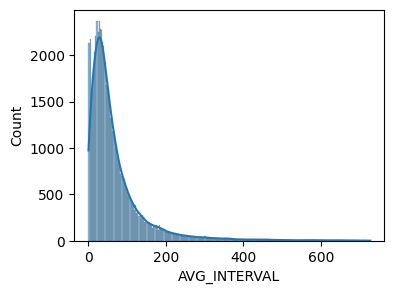

In [14]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='AVG_INTERVAL', kde=True)

<Axes: ylabel='FFP_TIER'>

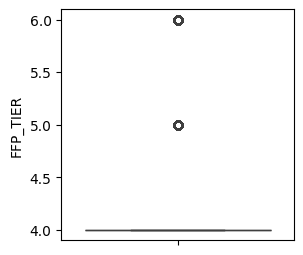

In [15]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df, y='FFP_TIER')

<Axes: xlabel='EXCHANGE_COUNT', ylabel='Count'>

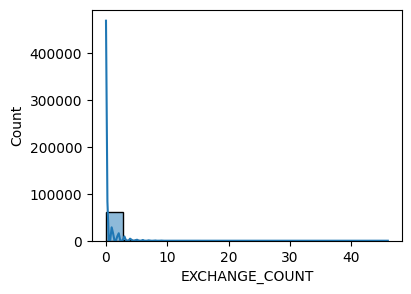

In [16]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='EXCHANGE_COUNT', kde=True)

<Axes: xlabel='Points_Sum', ylabel='Count'>

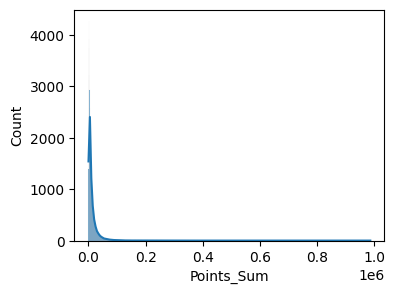

In [17]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Points_Sum', kde=True)

<Axes: xlabel='avg_discount', ylabel='Count'>

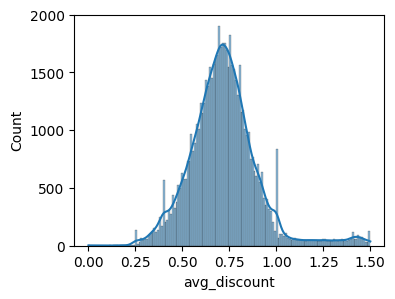

In [18]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='avg_discount', kde=True)

## Multivariate Analysis

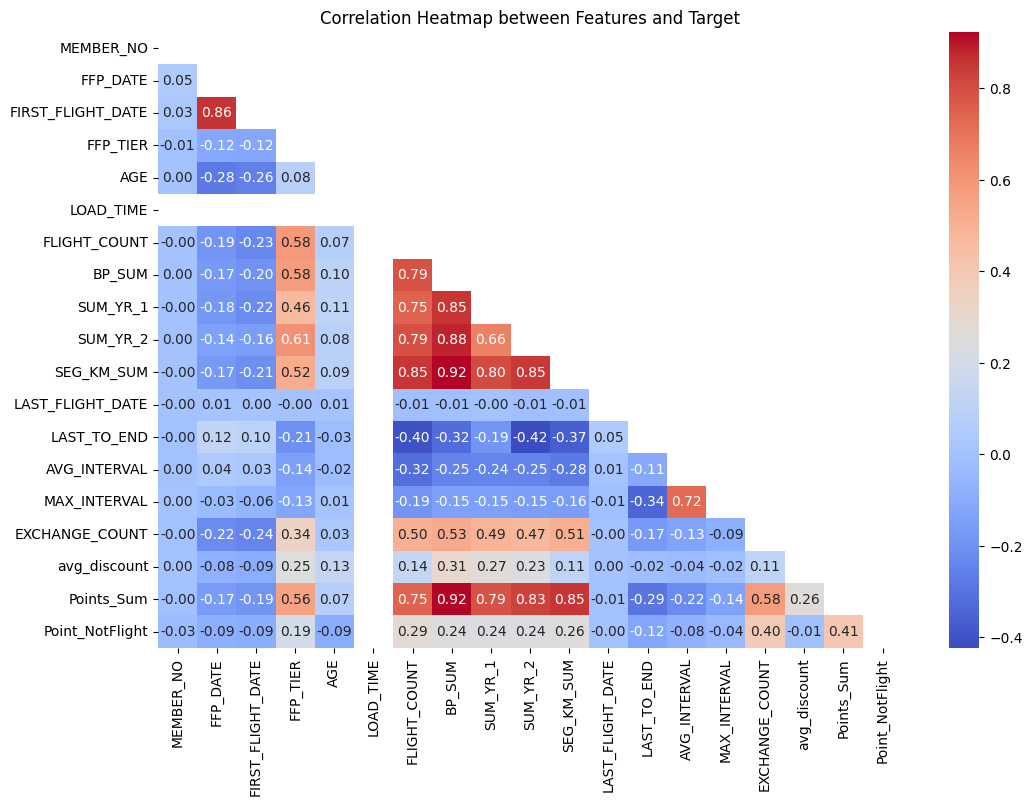

In [19]:
# Heatmap for data correlation
plt.figure(figsize=(12, 8))

corr = num.corr()

# create mask to hide lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data=corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap between Features and Target')
plt.show()

### Categorical Data Visualization

<Axes: xlabel='GENDER', ylabel='count'>

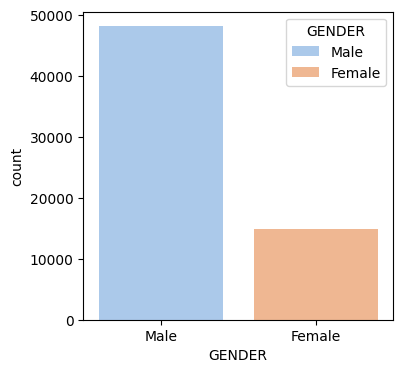

In [20]:
# Gender
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='GENDER', palette='pastel', hue='GENDER')

# Preprocessing

## Missing values

In [21]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [22]:
#replace missing values on numerical category with median
for item in df[numerical]:
    df[item] = df[item].fillna(df[item].median())

#replace missing values on categorical with mode
for item in df[categorical]:
    df[item] = df[item].fillna(df[item].mode().iloc[0])

In [23]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Duplicate values

In [24]:
df.duplicated().sum()

0

## Outliers

In [25]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 62988


In [26]:
features = df.select_dtypes(["float64", "int64", "boolean"]).columns

for f in features:
    Q1 = df[f].quantile(0.25)
    Q3 = df[f].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df[f] >= low_limit) & (df[f] <= high_limit))
    df = df[filtered_entries]

In [27]:
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris setelah memfilter outlier: 31033


## Feature Engineering

Feature selection is based on RFM model, spending habit, and Frequent Flyer Program engagement:

- LAST_TO_END : Time from the last boarding date to the end of the observation window (in months). Represents Recency. The more recent a customer has used airline services (high recency value), the greater the possibility of returning. Meanwhile, customers who have not used an airline for a long time have the potential to churn.

- FLIGHT_COUNT : number of flights. Represents Frequency. This feature indicates customer engagement and loyalty towards the airline. Customers who travel frequently may have business goals or have a flexible schedule.

- SEG_KM_SUM : distance traveled (in kilometers). This feature reflects customers' traveling pattern and spending habit. Customers who have high mileage can be targeted with special benefits, and so on. Indirectly, high mileage also indicates high income.

- SUM_YR_1 : the total airline revenue generated from customers. This feature shows customer spending habit.

- LENGTH : customer membership length (in months). This feature shows customer loyalty. We can identify any customer who hasn't used the airline in a long time.

  LENGTH = LOAD_TIME - FFP_DATE

- Points_Sum :
thetotal points earned by customers. This feature is related to loyalty and engagement. Customers who have high points have high loyalty andhighe possibility of engagement so they are more receptive to marketing campaigns.
  
- avg_discount average discount received by customers. This feature is related to loyalty. Customers who frequently receive discounts have a high probability of continuing to use the airline.


Reference: https://www.ijres.org/papers/Volume-10/Issue-4/Ser-5/B10040513.pdf

In [28]:
# subtract FFP_DATE from LOAD_TIME and change to month (assuming 1 year=365 days and 1 year=12months)
df['LENGTH'] = (df['LOAD_TIME'] - df['FFP_DATE']) / np.timedelta64(1, 'D') * 0.03285
df['LENGTH'].head()

11738     16.03080
11817    111.88710
11886    111.95280
12003     31.30605
12074     48.45375
Name: LENGTH, dtype: float64

In [29]:
# Final dataframe
df_feature = df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','SUM_YR_1','Points_Sum','avg_discount']]
df_feature.sample(5)

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,Points_Sum,avg_discount
60536,393,2,2020,1104.0,1034,0.575000
45408,115,2,5870,0.0,2138,0.605000
59844,35,3,2382,0.0,634,0.540277
24825,33,11,20483,6315.0,5566,0.469270
47078,170,5,4418,1680.0,2814,0.735317


## Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

X = df_feature.values

X_std = StandardScaler().fit_transform(X)

df_std = pd.DataFrame(data = X_std, columns = df_feature.columns)
df_std.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,Points_Sum,avg_discount
count,3.103300e+04,3.103300e+04,31033.000000,3.103300e+04,3.103300e+04,3.103300e+04
mean,2.930734e-17,5.861468e-17,0.000000,2.930734e-17,-8.792202e-17,1.758440e-16
std,1.000016e+00,1.000016e+00,1.000016,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.171146e+00,-9.764950e-01,-1.441260,-1.099840e+00,-1.395857e+00,-2.743692e+00
25%,-8.451887e-01,-7.413338e-01,-0.791350,-7.985357e-01,-7.944013e-01,-6.686281e-01
50%,-2.885540e-01,-2.710116e-01,-0.260195,-2.055347e-01,-2.565439e-01,3.609450e-02
75%,7.093766e-01,4.344718e-01,0.590229,5.455417e-01,5.862811e-01,6.969292e-01
max,2.489605e+00,5.137694e+00,3.174892,3.379109e+00,3.273751e+00,2.799309e+00


# KMeans Clustering

## Elbow Method

In [31]:
import warnings
warnings.simplefilter('ignore')

In [32]:
from sklearn.cluster import KMeans

In [33]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

<Axes: >

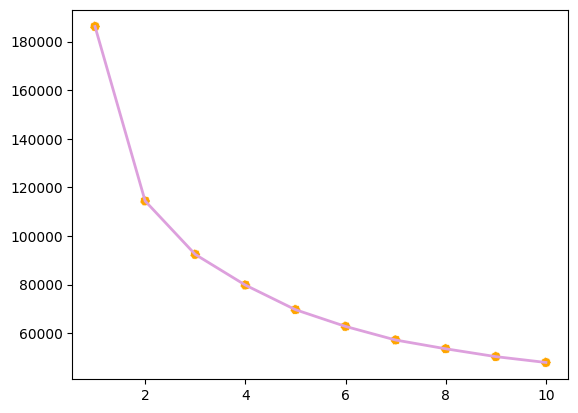

In [34]:
sns.lineplot(x=range(1, 11), y=inertia, color='plum', linewidth = 2)
sns.scatterplot(x=range(1, 11), y=inertia, s=50, color='orange',  linestyle='--')

In [35]:
# Calculate inertia decrease in each step
percentage_decrease = (pd.Series(inertia) - pd.Series(inertia).shift(-1))/pd.Series(inertia)*100

for i in range(len(np.diff(inertia))):
    print(f"Clusters: {i + 2}, Percentage Decrease: {percentage_decrease[i]:.2f}%")

Clusters: 2, Percentage Decrease: 38.57%
Clusters: 3, Percentage Decrease: 19.22%
Clusters: 4, Percentage Decrease: 13.65%
Clusters: 5, Percentage Decrease: 12.69%
Clusters: 6, Percentage Decrease: 9.89%
Clusters: 7, Percentage Decrease: 8.91%
Clusters: 8, Percentage Decrease: 6.31%
Clusters: 9, Percentage Decrease: 6.03%
Clusters: 10, Percentage Decrease: 4.77%


From clusters 2 to 3 seems to show no significant decrease anymore, but it's rare to see only 2 optimum clusters. It's a bit difficult to determine the optimum number of cluster based on these values alone, so I chose 3 clusters as a starting point.

## Silhouette Score

In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [37]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [38]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    preds = kmeans.predict(df_std)

    score_euclidean = silhouette_score(df_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

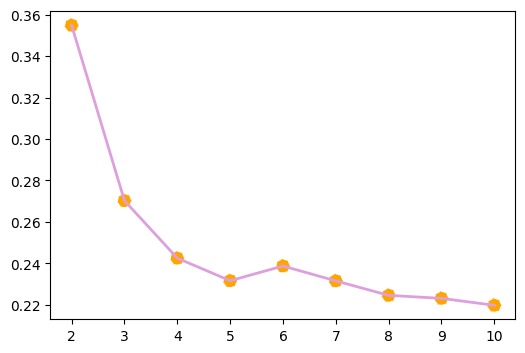

In [39]:
plt.figure(figsize=(6,4))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='plum', linewidth = 2)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=100, color='orange',  linestyle='--')

In [40]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2, the average silhouette_score is : 0.35472554347725416


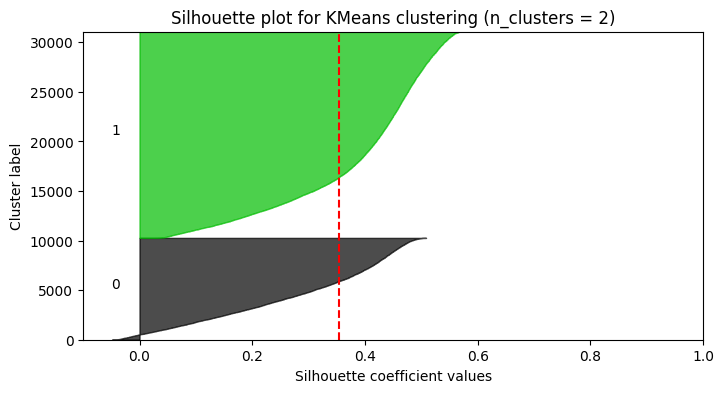

For n_clusters = 3, the average silhouette_score is : 0.27038170970441605


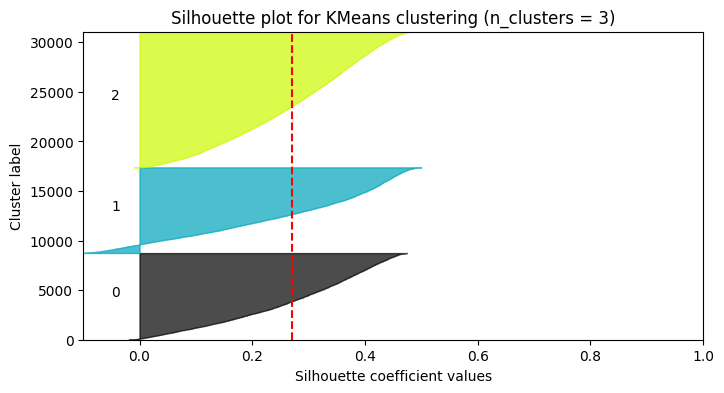

For n_clusters = 4, the average silhouette_score is : 0.2425258736833375


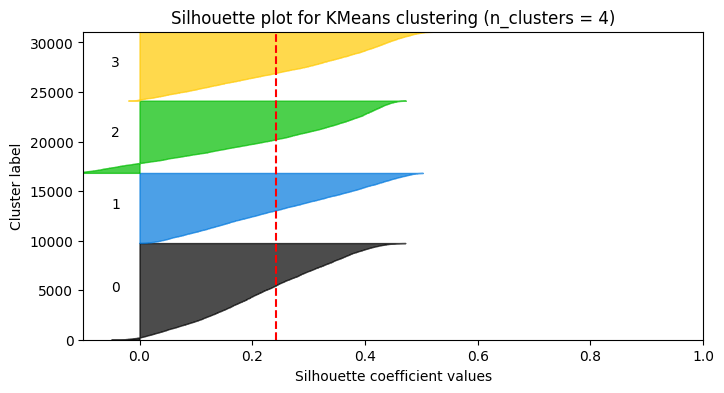

For n_clusters = 5, the average silhouette_score is : 0.23155437337472115


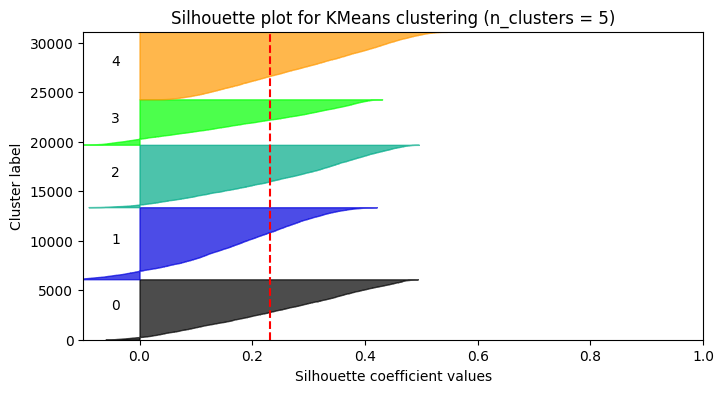

In [41]:
# Silhouette Chart

# Create silhouette plots for different numbers of clusters
cluster_range = range(2, 6)

for n_clusters in cluster_range:
    # Create a KMeans model
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, random_state=10)

    # Fit the model to the standardized features
    cluster_labels = kmeans.fit_predict(df_std)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(8, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for KMeans clustering (n_clusters = {})".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

**Another way to visualize silhouette plot using yellowbrick package**

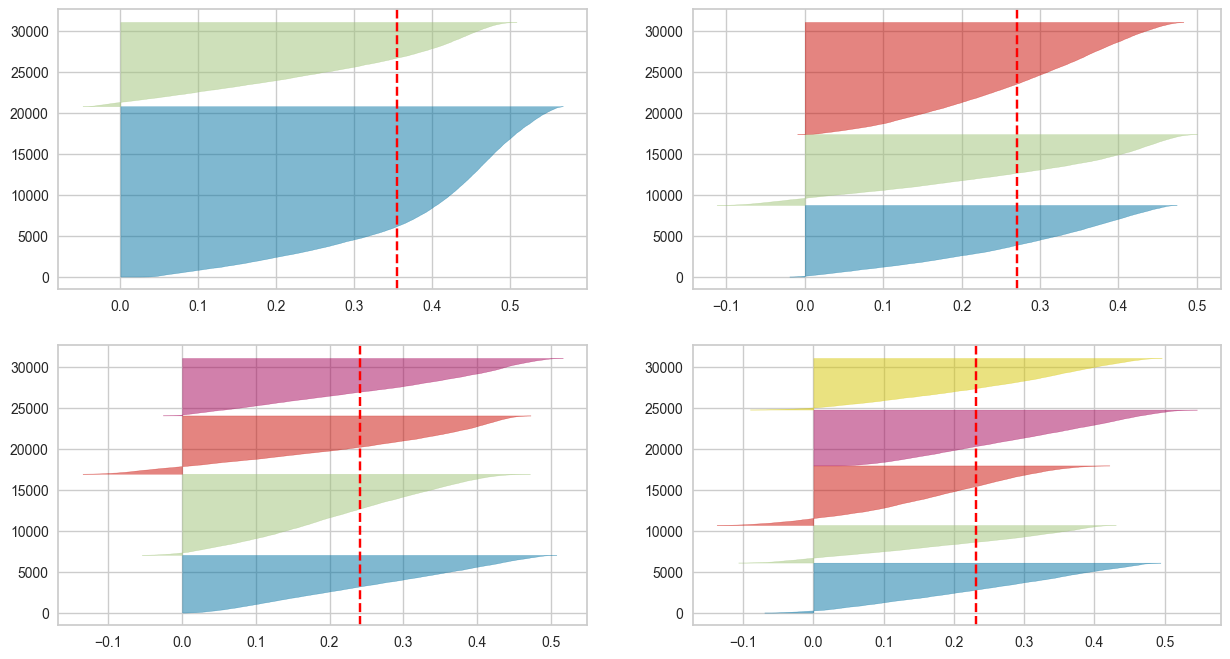

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_std)

- Deciding point 1: higher average silhouette score

Kaufmann and Rousseeuw (1990) named the overall average the silhouette coefficient (SC). By their classification, if SC > 0.70, the structure of the clusters is strong. If SC is between 0.51 and 0.70 the structure is reasonable. Lower values indicate poor structure.

Here, the highest silhouette score was found on n_clusters 2 and the value is 0.38 which means the separation of cluster is poor. Higher n_clusters results in poorer structure. Now we look at silhouette plot to consider the shape of clusters as well.

- Deciding point 2: the presence of clusters below the average silhouette score

A sub-optimal n_cluster will show the presence of clusters below the average silhouette score. For this given data, none of the n_clusters shows value below the average score.

- Deciding point 3: the width/thickness of each cluster

I measured the difference of thickness between the thinnest cluster and thickest cluster manually using a ruler and found that n_clusters 3 has the smallest difference. In other words, the thickness of each cluster is more uniform.

I chose n_clusters: 2 as the optimum number of cluster.

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=300, random_state=10)
kmeans.fit(X_std)
df_std['cluster'] = kmeans.labels_

In [44]:
from sklearn.decomposition import PCA

In [45]:
# 2D visualization with PCA

pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']

In [46]:
df_pca.head(3)

,PC 1,PC 2,cluster
0,5.438656,0.858763,0
1,2.906984,2.208290,0
2,5.812982,0.852257,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

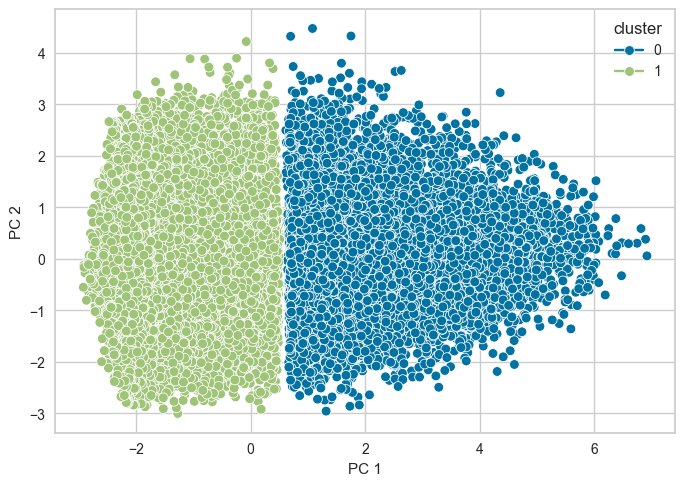

In [47]:
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    linestyle='-',
    data=df_pca
)

**Attach cluster to initial dataframe before standardization (df_feature)**

In [48]:
df_feature['cluster'] = kmeans.labels_

In [49]:
df_feature.sample(5)

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,Points_Sum,avg_discount,cluster
36267,19,6,10199,0.0,3110,0.545814,1
49779,579,2,3876,1928.0,2810,0.719969,1
40495,418,4,6542,4340.0,3891,0.693763,1
33627,134,5,10187,976.0,4418,0.618948,1
24108,4,12,15183,2315.0,8477,0.657063,0


In [50]:
df_final = df_feature.groupby('cluster').agg(['mean','median']).reset_index()
df_final

cluster LAST_TO_END        FLIGHT_COUNT           SEG_KM_SUM           \
                 mean median         mean median          mean   median   
0       0  129.186532   87.0    10.709190   10.0  14597.635513  13999.0   
1       1  286.584729  251.0     3.901502    4.0   5269.275660   4843.0   

      SUM_YR_1           Points_Sum         avg_discount            
          mean  median         mean  median         mean    median  
0  4417.559984  4347.0  8347.876133  7980.0     0.710834  0.709929  
1  1580.672939  1380.0  2762.219045  2518.0     0.680635  0.683107

In [51]:
df_feature['cluster'].value_counts()

cluster
1    20772
0    10261
Name: count, dtype: int64

In [52]:
df_final

cluster LAST_TO_END        FLIGHT_COUNT           SEG_KM_SUM           \
                 mean median         mean median          mean   median   
0       0  129.186532   87.0    10.709190   10.0  14597.635513  13999.0   
1       1  286.584729  251.0     3.901502    4.0   5269.275660   4843.0   

      SUM_YR_1           Points_Sum         avg_discount            
          mean  median         mean  median         mean    median  
0  4417.559984  4347.0  8347.876133  7980.0     0.710834  0.709929  
1  1580.672939  1380.0  2762.219045  2518.0     0.680635  0.683107

# Agglomerative Clustering

In [53]:
df_std2 = df_std.copy()

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
ac.fit(df_std2)

AgglomerativeClustering(affinity='euclidean')

In [56]:
df_feature2 = df_feature.copy()

# add column clusters to raw data
df_feature2['clusters'] = ac.labels_

In [57]:
df_final2 = df_feature2.groupby('clusters').agg(['mean','median']).reset_index()
df_final2

clusters LAST_TO_END        FLIGHT_COUNT           SEG_KM_SUM           \
                  mean median         mean median          mean   median   
0        0  286.632284  251.0     3.900944    4.0   5269.485890   4843.5   
1        1  129.182332   87.0    10.706341   10.0  14591.758839  13997.0   

      SUM_YR_1           Points_Sum         avg_discount             cluster  \
          mean  median         mean  median         mean    median      mean   
0  1579.156038  1380.0  2762.166089  2518.0     0.680579  0.682998  1.000000   
1  4418.970196  4350.0  8344.719003  7979.0     0.710931  0.709970  0.000584   

          
  median  
0    1.0  
1    0.0

In [58]:
df_feature2['clusters'].value_counts()

clusters
0    20766
1    10267
Name: count, dtype: int64

## Dendrogram

In [75]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram

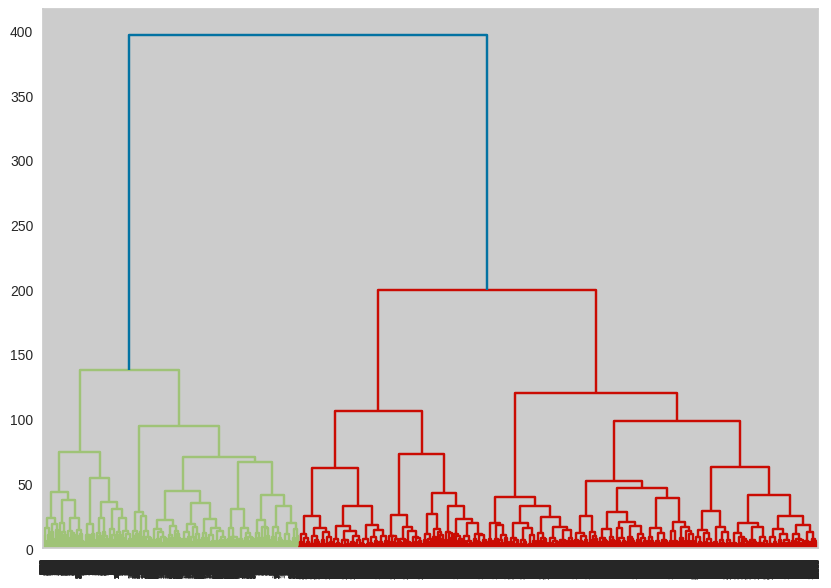

In [82]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df_std2, method='ward'))

## Silhouette Score

In [86]:
for k in range(2, 7):
    # Perform Agglomerative Clustering
    agc = AgglomerativeClustering(n_clusters=k).fit(df_std2)

    # Get cluster labels
    labels = agc.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_std2, labels)
    print(f"Silhouette Score for Agglomerative Clustering with n_clusters={k}: {silhouette_avg}")

Silhouette Score for Agglomerative Clustering with n_clusters=2: 0.37886582324801865
Silhouette Score for Agglomerative Clustering with n_clusters=3: 0.2748748158280477
Silhouette Score for Agglomerative Clustering with n_clusters=4: 0.23668815091755593
Silhouette Score for Agglomerative Clustering with n_clusters=5: 0.18417953710124454
Silhouette Score for Agglomerative Clustering with n_clusters=6: 0.17017758639610678


For n_clusters = 2, the average silhouette_score is : 0.37886582324801865


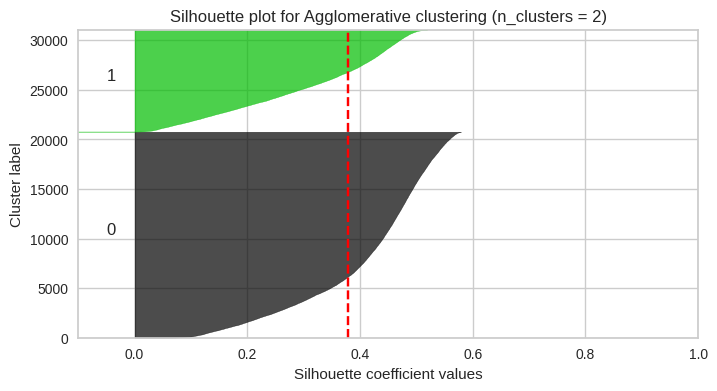

For n_clusters = 3, the average silhouette_score is : 0.2748748158280477


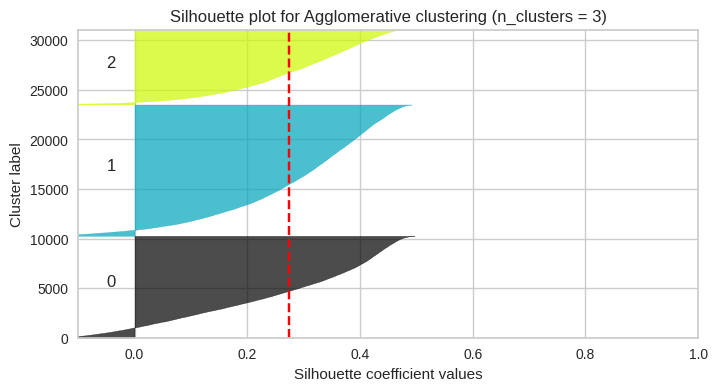

For n_clusters = 4, the average silhouette_score is : 0.23668815091755593


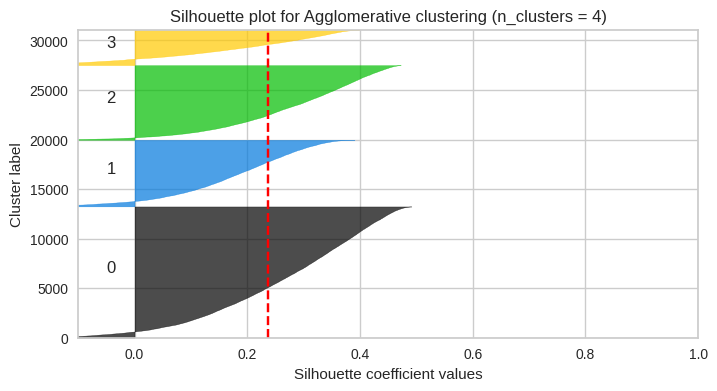

For n_clusters = 5, the average silhouette_score is : 0.18417953710124454


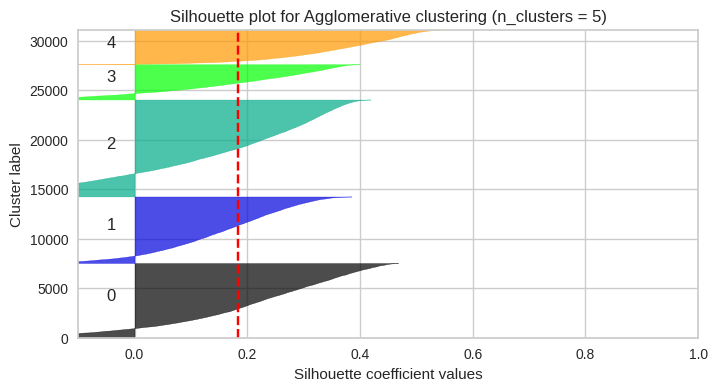

In [96]:
# Silhouette Chart

# Create silhouette plots for different numbers of clusters
cluster_range = range(2, 6)

for n_clusters in cluster_range:
    # Create an agglomerative model
    ac = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the standardized features
    cluster_labels = ac.fit_predict(df_std)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(8, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for Agglomerative clustering (n_clusters = {})".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

**Kmeans clustering resulted in higher silhouette scores, so It is preferred over Agglomerative clustering.**

**Customer Segmentation Visualization:**

Another way to easily interpret the characteristics of each cluster is by using radar chart.

In [59]:
import plotly.express as px
import pandas as pd

In [60]:
# attach labels to standardized data
df_std['cluster'] = kmeans.labels_

In [61]:
df_temp = df_std.groupby('cluster').agg(['median']).reset_index()
df_temp.columns = ['cluster','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','SUM_YR_1','Points_Sum','avg_discount']
df_temp

,cluster,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,Points_Sum,avg_discount
0,0,-0.739879,0.904794,1.018871,0.798375,1.020867,0.125809
1,1,0.082536,-0.506173,-0.633610,-0.497232,-0.633286,-0.048955


In [62]:
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.graph_objects as go

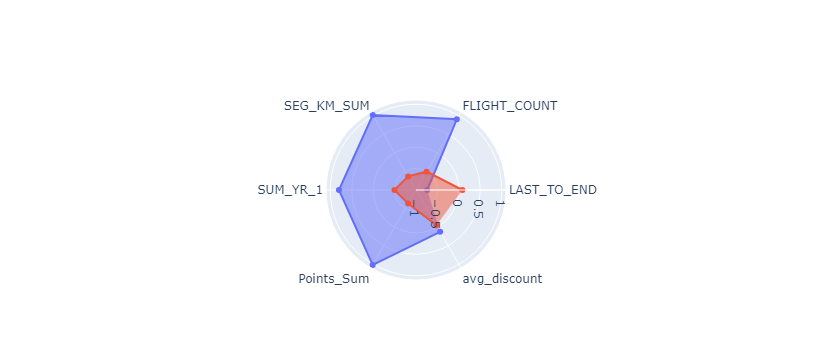

In [64]:
df_radar = [
    go.Scatterpolar(
        r = [-0.739879, 0.904794, 1.018871, 0.798375, 1.020867, 0.125809],
        theta = ['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'Points_Sum', 'avg_discount'],
        fill = 'toself',
        name = '0'
    ),
    go.Scatterpolar(
        r = [0.082536, -0.506173, -0.633610, -0.497232, -0.633286, -0.048955],
        theta = ['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'Points_Sum', 'avg_discount'],
        fill = 'toself',
        name = '1'
    )
]

layout = go.Layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [-1, 1.1]
        )
    ),
    showlegend = False
)

fig = go.Figure(data=df_radar, layout=layout)
fig.show()

# Insight
**Cluster 0:**

- Characteristic:

  High recency score (low LAST_TO_END), high frequency, high monetary, high spending power, high points, average discount.

- Interpretation: can be considered as 'premium customer'. They often fly and do not hesitate to spend money. Possible include business traveler and people with flexible schedule.
  
**Cluster 1:**

- Characteristic:

  Average recency score (average LAST_TO_END), low frequency, low monetary, low spending power, low points, average discount.

- Interpretation: can be considered as 'potential customer' because they have low score across all aspects. They received the same amount of discount as other cluster but did not engage with airline.

# Business Recommendation

**Cluster 0 (Premium Customer)**

Goal: Maintain loyalty and increase purchases

Strategy:

*   Provide special offers and rewards for loyal customer.
*   Provide exclusive experience in their journey, such as exclusive check-in counter, access to VIP lounge, priority boarding, upgrade to a higher class, and extra baggage allowance.
*  Use customer data to provide personalized experiences, such as flight recommendations or tour packages. Offer additional products or services that are relevant to the customer's purchasing history.
*  Collaborate with airlines, hotels, tour & travel companies, and insurance companies to offer attractive tour packages and travel insurance.


**Cluster 1 (Potential Customer)**

Goal: Drive engagement and encourage purchase

Strategy:

*   Offer attractive discounts and promotions.
*   Send personalized emails with product or service recommendations based on customer interests and purchase history.
*   Send surveys to identify potential barriers and how to overcome them.

# Other

Another way to create radar chart (could only be run in google colab):

In [106]:
# data
df_radar = pd.DataFrame(dict(
    value = [1.331203, -0.741334, -0.797666, -0.051389, -0.734437, 0.272067,
            -0.724835, 1.139955, 1.165782, 0.964747, 1.186222, 0.144511,
            -0.574393, -0.271012, -0.409633, -0.806396, -0.460058, -0.211217],
    variable = ['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'avg_discount', 'Points_Sum',
               'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'avg_discount', 'Points_Sum',
                'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'avg_discount', 'Points_Sum'],
    group = ['0', '0', '0', '0', '0', '0',
            '1', '1', '1', '1', '1', '1',
             '2', '2', '2', '2', '2', '2']))

fig = px.line_polar(df_radar, r = 'value', theta = 'variable', line_close = True,
                    color = 'group')
fig.update_traces(fill = 'toself')

fig.show()